## Exploring the data

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

teams = pd.read_csv('data/original/teams.csv')
players = pd.read_csv('data/original/players.csv')
coaches = pd.read_csv('data/original/coaches.csv')
players_teams = pd.read_csv('data/original/players_teams.csv')
series_post = pd.read_csv('data/original/series_post.csv')
awards_players = pd.read_csv('data/original/awards_players.csv')
teams_post = pd.read_csv('data/original/teams_post.csv')

### The Win Rate that every team has in the dataset

            won         GP  win_rate
tmID                                
LAS   22.000000  33.400000  0.661949
CON   20.428571  34.000000  0.600840
UTA   19.000000  32.000000  0.593750
HOU   18.888889  33.333333  0.569853
SAC   18.700000  33.400000  0.560110


C:\Users\joaot\AppData\Local\Temp\ipykernel_3352\3581223079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams_wins['win_rate'] = teams_wins['won'] / teams_wins['GP']


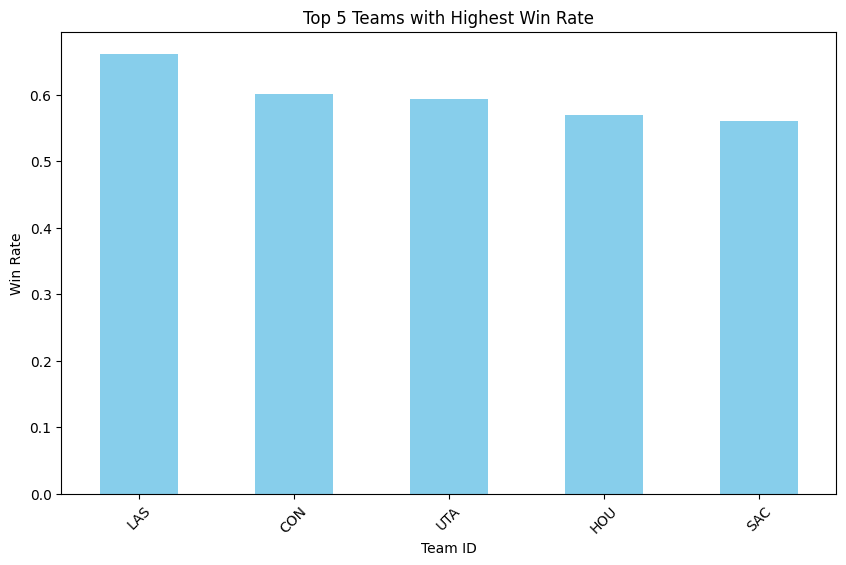

In [48]:
teams_wins = teams[['tmID', 'won', 'GP']]  
teams_wins['win_rate'] = teams_wins['won'] / teams_wins['GP']

teams_wins = teams_wins.groupby('tmID').mean()

top_5_teams_winrate = teams_wins.sort_values(by='win_rate', ascending=False).head(5)

top_5_teams_winrate['win_rate'].plot(kind='bar', figsize=(10, 6), color='skyblue')

print(top_5_teams_winrate)
plt.xlabel('Team ID')
plt.ylabel('Win Rate')
plt.title('Top 5 Teams with Highest Win Rate')

plt.xticks(rotation=45)

plt.show()


### Columns with unique values equal to 1

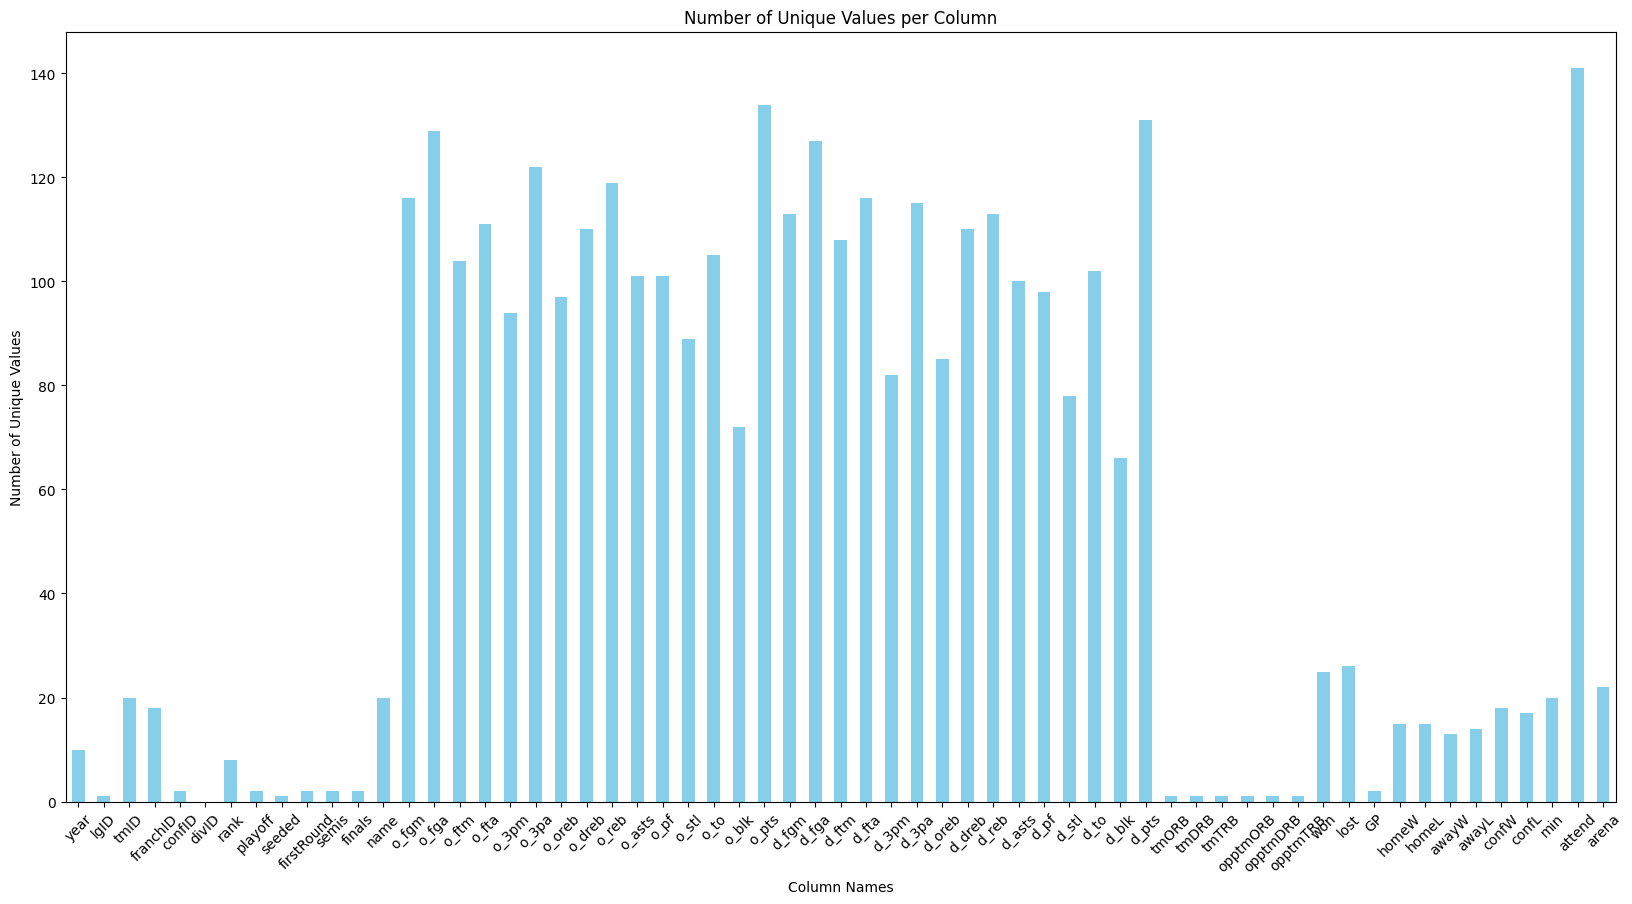

In [49]:
def plot_unique_values(data):
    unique_values = []
    
    for column in data.columns:
        unique_values.append(data[column].nunique())
    
    unique_values = pd.Series(unique_values, index=data.columns)
    
    unique_values.plot(kind='bar', figsize=(20, 10), color='skyblue')
    
    plt.xlabel('Column Names')
    plt.ylabel('Number of Unique Values')
    plt.title('Number of Unique Values per Column')
    plt.xticks(rotation=45)  
    plt.show()


plot_unique_values(teams)

### Correlation between the columns


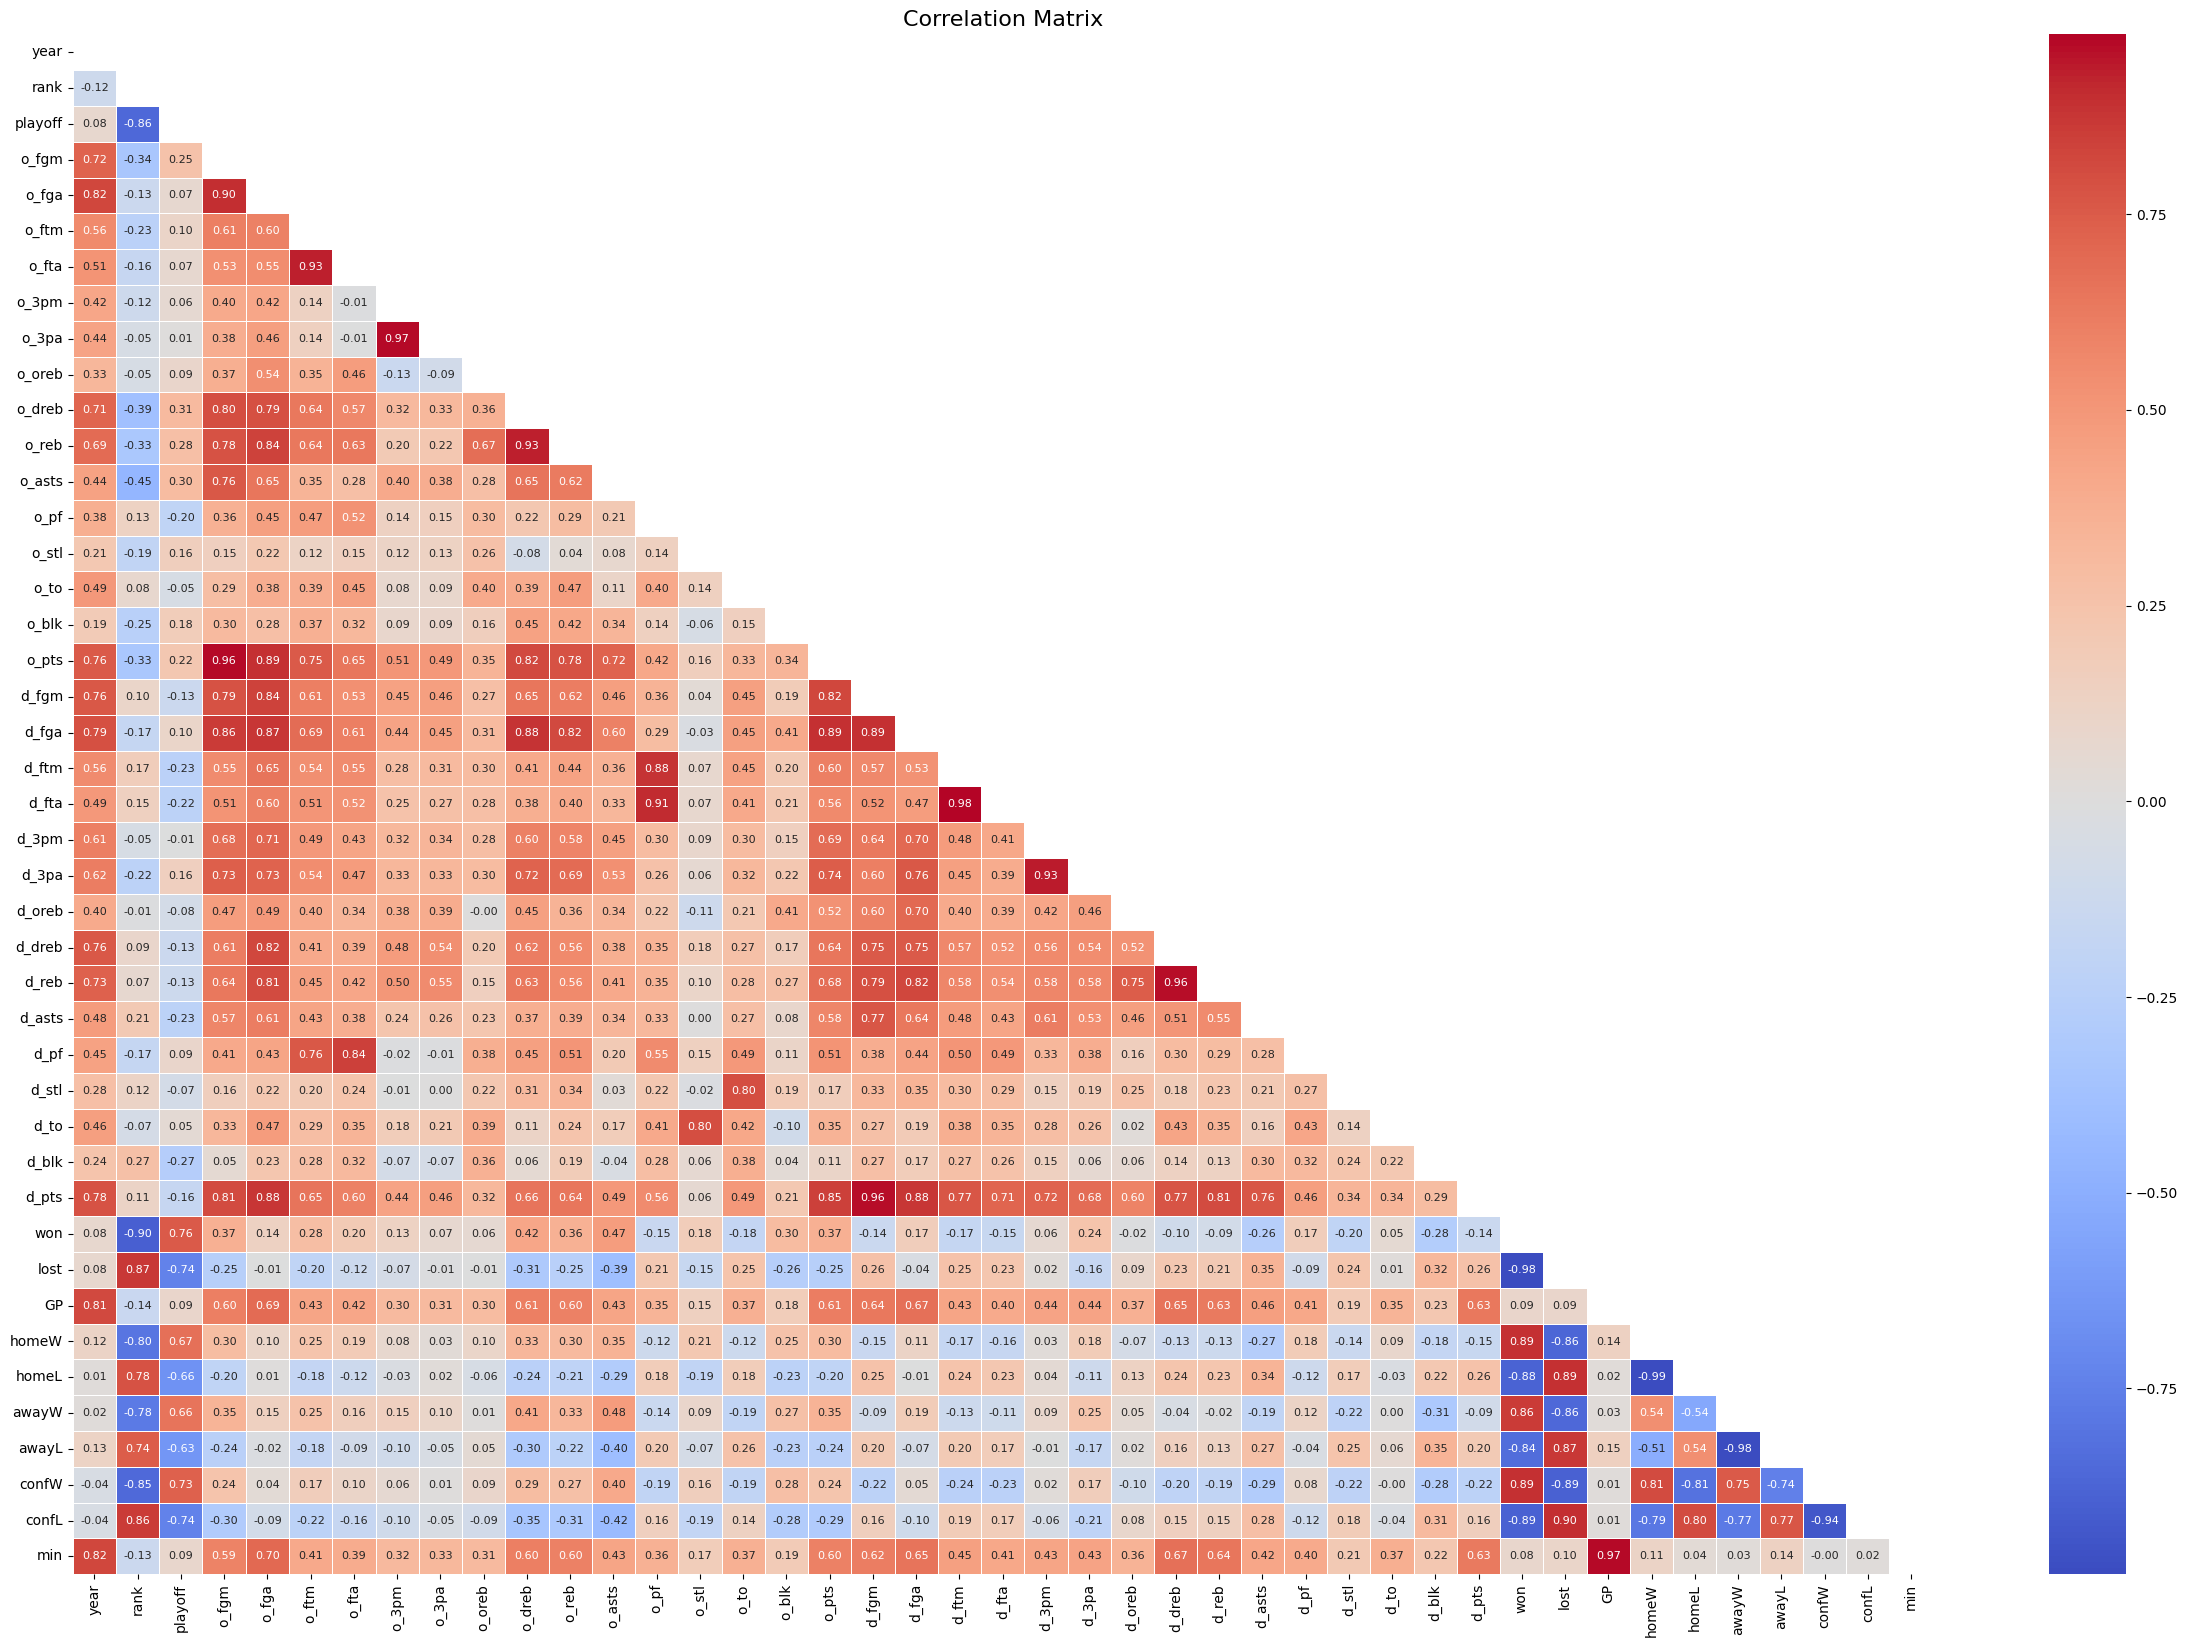

In [50]:
import seaborn as sns
import numpy as np

teams = teams.drop(columns=['lgID', 'divID', 'seeded', 'arena', 'name', 'tmORB', 'tmDRB', 'tmTRB', 'opptmORB', 'opptmDRB', 'opptmTRB', 'attend'])

def correlation_matrix(dataframe):
    if 'playoff' in dataframe.columns:
        dataframe['playoff'] = dataframe['playoff'].map({'Y': 1, 'N': 0})

    numeric_data = dataframe.select_dtypes(include=[np.number])
    
    corr_matrix = numeric_data.corr()

    if 'playoff' in corr_matrix.columns:
        target_correlation = corr_matrix['playoff']
    else:
        print("Coluna 'playoff' não encontrada.")
        return
    
    plt.figure(figsize=(30, 20))

    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    sns.heatmap(corr_matrix, mask=mask, annot=True, annot_kws={"size": 8}, cmap='coolwarm', linewidths=0.5, fmt=".2f")

    plt.title('Correlation Matrix', fontsize=16)
    plt.show()

correlation_matrix(teams)



### Number of playoffs participated by each team

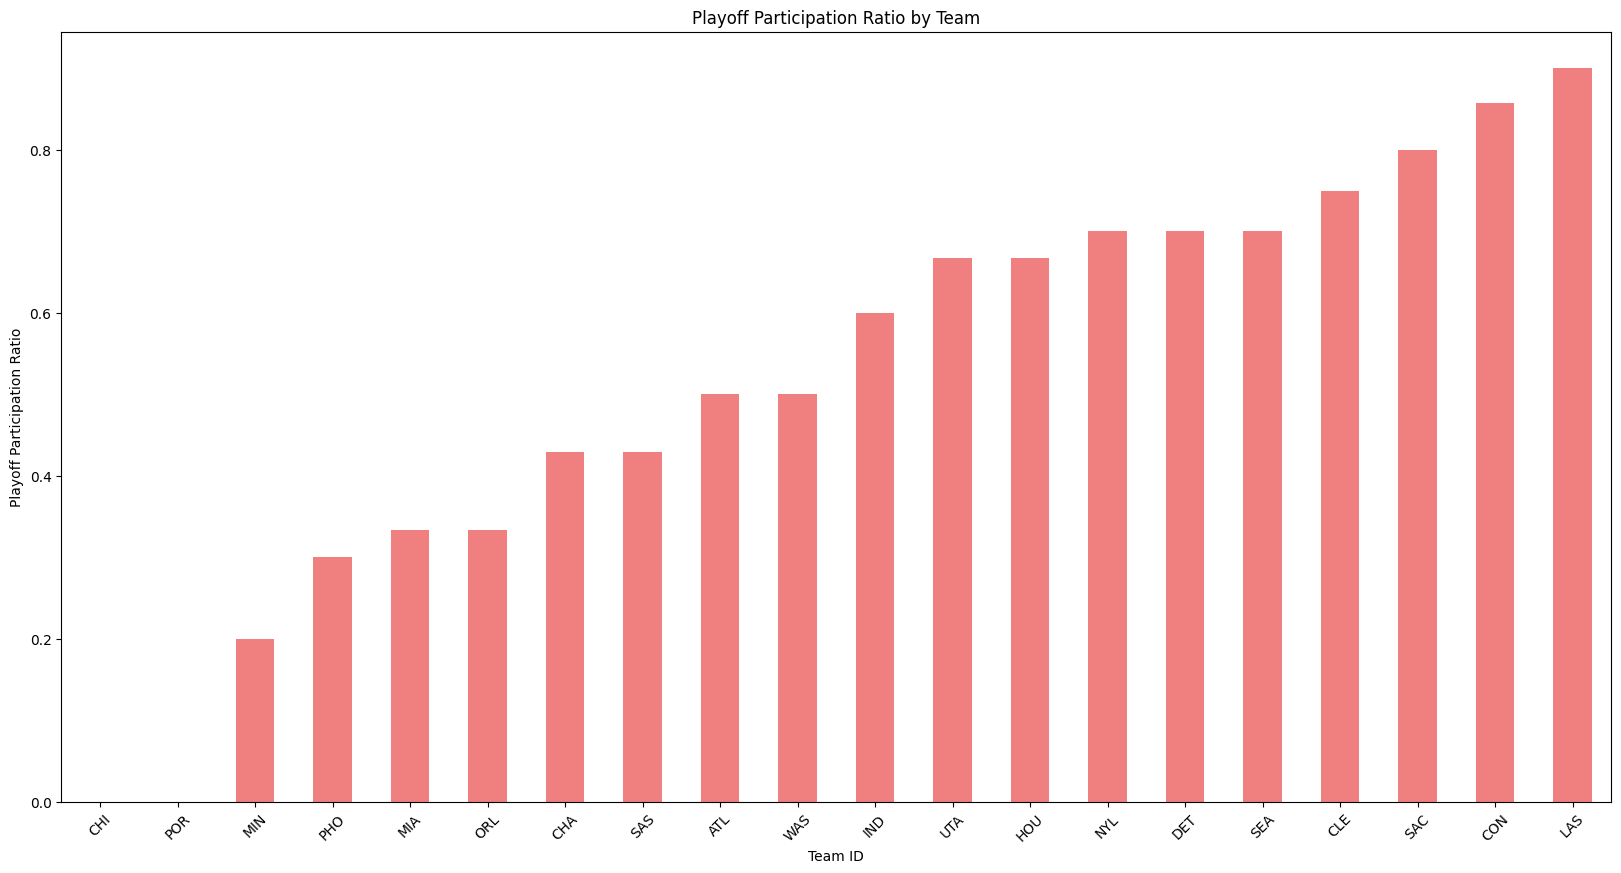

In [57]:
playoff_participations = teams.groupby('tmID')['playoff'].sum()

seasons_played = teams.groupby('tmID')['GP'].count()

playoff_ratio = playoff_participations / seasons_played

playoff_ratio = playoff_ratio.sort_values(ascending=True)

playoff_ratio.plot(kind='bar', figsize=(20, 10), color='lightcoral')

plt.title('Playoff Participation Ratio by Team')
plt.xlabel('Team ID')
plt.ylabel('Playoff Participation Ratio')
plt.xticks(rotation=45)
plt.show()




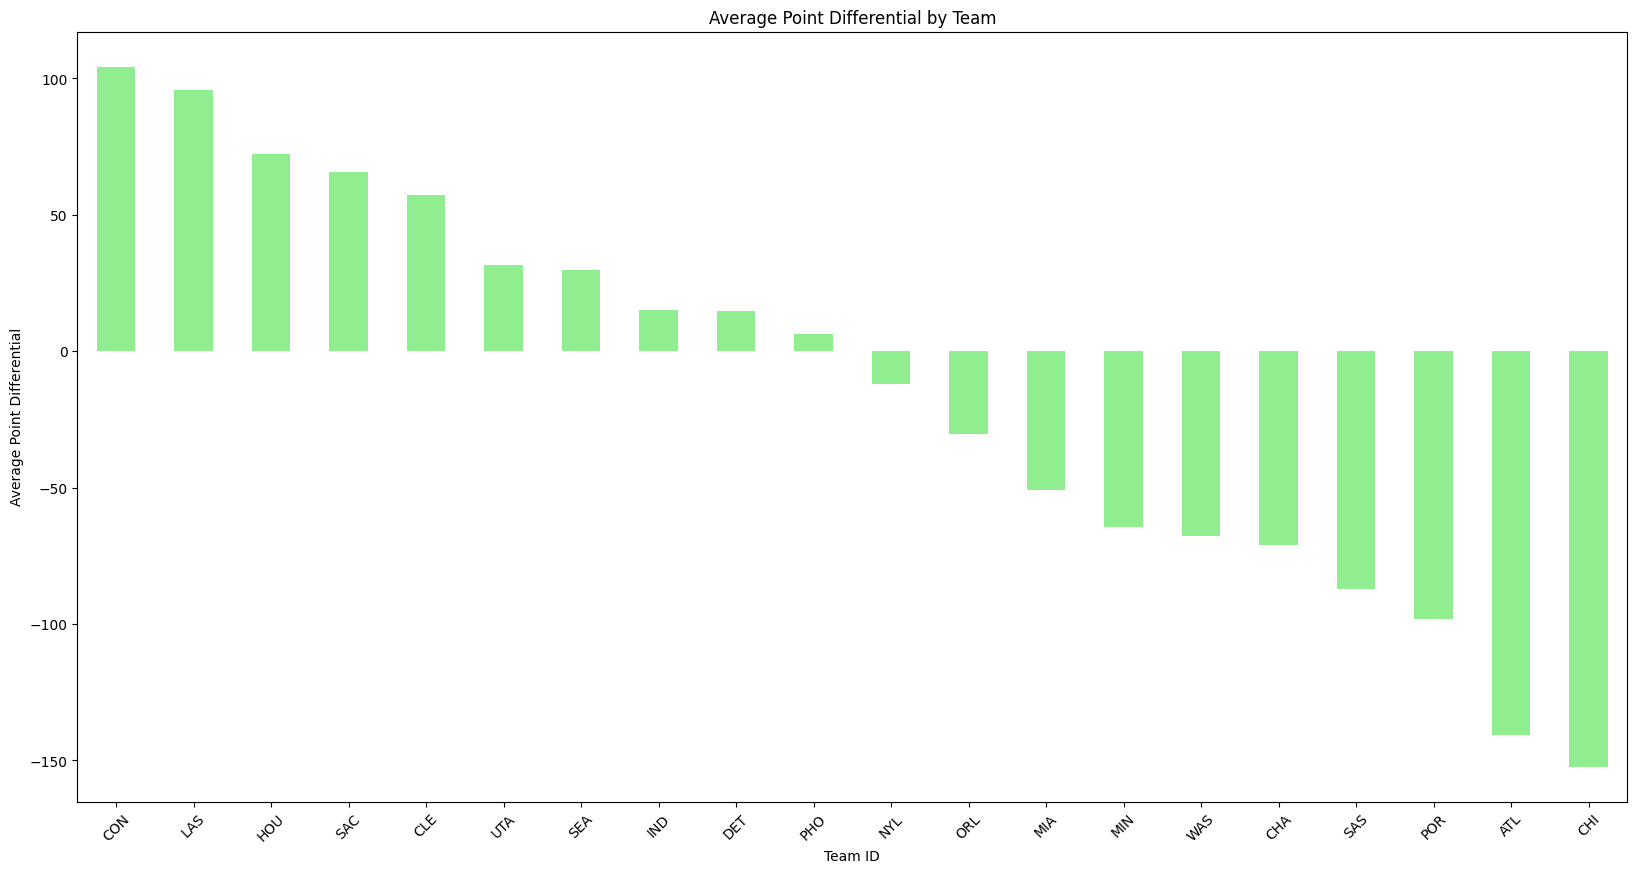

In [52]:
teams['point_diff'] = teams['o_pts'] - teams['d_pts']
teams_diff = teams.groupby('tmID')['point_diff'].mean().sort_values(ascending=False)
teams_diff.plot(kind='bar', figsize=(20, 10), color='lightgreen')
plt.title('Average Point Differential by Team')
plt.xlabel('Team ID')
plt.ylabel('Average Point Differential')
plt.xticks(rotation=45)
plt.show()


### First Improvement - Models Accuracy Graph

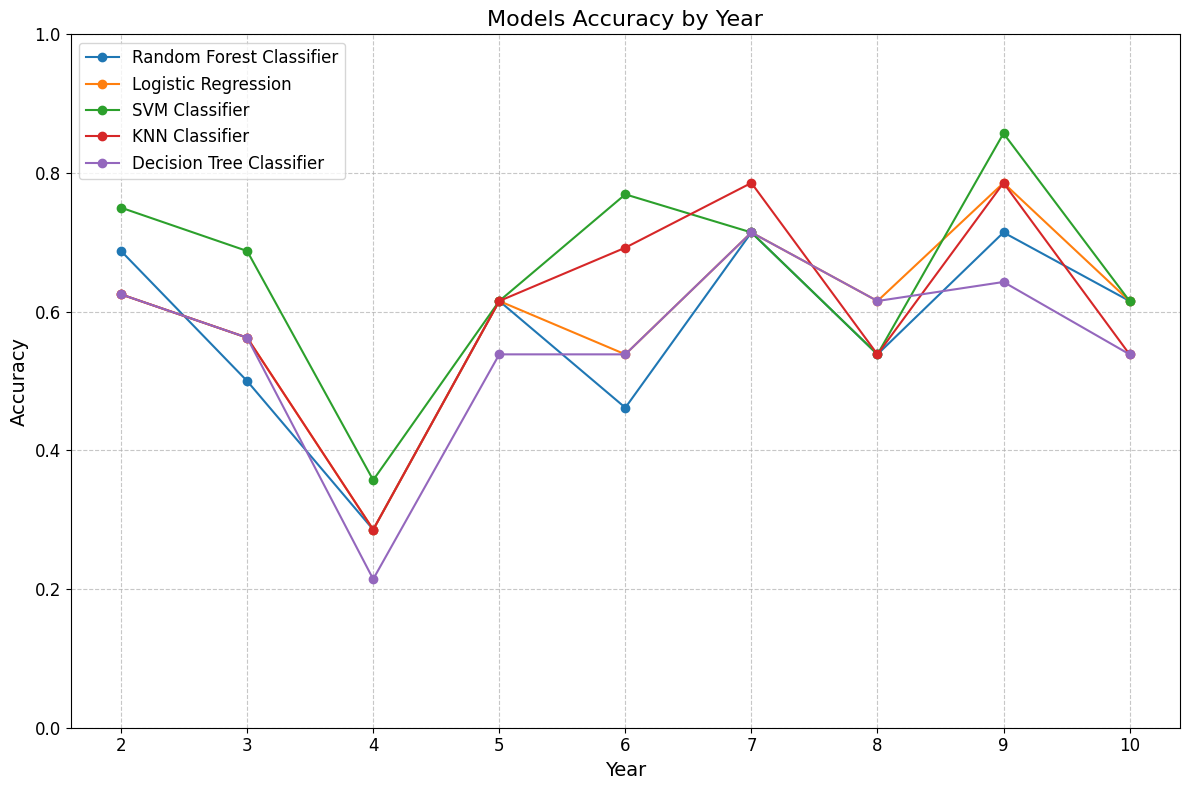

In [53]:
years = range(2, 11)
accuracy_years_RFC = [0.6875, 0.5, 0.2857142857142857, 0.6153846153846154, 0.46153846153846156, 0.7142857142857143, 0.5384615384615384, 0.7142857142857143, 0.6153846153846154]
accuracy_years_LR = [0.625, 0.5625, 0.2857142857142857, 0.6153846153846154, 0.5384615384615384, 0.7142857142857143, 0.6153846153846154, 0.7857142857142857, 0.6153846153846154]
accuracy_years_SVM = [0.75, 0.6875, 0.35714285714285715, 0.6153846153846154, 0.7692307692307693, 0.7142857142857143, 0.5384615384615384, 0.8571428571428571, 0.6153846153846154]
accuracy_years_KNN = [0.625, 0.5625, 0.2857142857142857, 0.6153846153846154, 0.6923076923076923, 0.7857142857142857, 0.5384615384615384, 0.7857142857142857, 0.5384615384615384]
accuracy_years_DTC = [0.625, 0.5625, 0.21428571428571427, 0.5384615384615384, 0.5384615384615384, 0.7142857142857143, 0.6153846153846154, 0.6428571428571429, 0.5384615384615384]

plt.figure(figsize=(12, 8))
plt.plot(years, accuracy_years_RFC, label='Random Forest Classifier', marker='o')
plt.plot(years, accuracy_years_LR, label='Logistic Regression', marker='o')
plt.plot(years, accuracy_years_SVM, label='SVM Classifier', marker='o')
plt.plot(years, accuracy_years_KNN, label='KNN Classifier', marker='o')
plt.plot(years, accuracy_years_DTC, label='Decision Tree Classifier', marker='o')

plt.title('Models Accuracy by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(years, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


### Second Improvement - Models Accuracy Graph

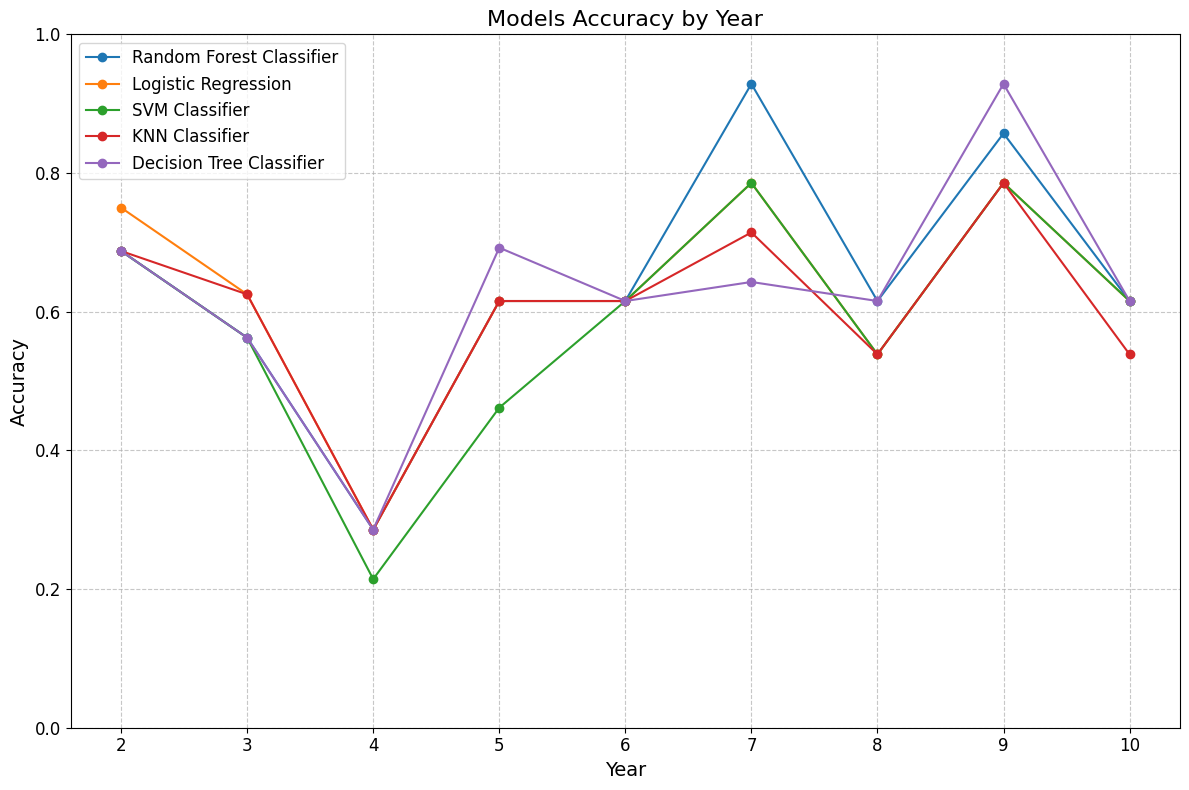

In [54]:
years = range(2, 11)
accuracy_years_RFC = [0.6875, 0.5625, 0.2857142857142857, 0.6153846153846154, 0.6153846153846154, 0.9285714285714286, 0.6153846153846154, 0.8571428571428571, 0.6153846153846154]
accuracy_years_LR = [0.75, 0.625, 0.2857142857142857, 0.6153846153846154, 0.6153846153846154, 0.7857142857142857, 0.5384615384615384, 0.7857142857142857, 0.6153846153846154]
accuracy_years_SVM = [0.6875, 0.5625, 0.21428571428571427, 0.46153846153846156, 0.6153846153846154, 0.7857142857142857, 0.5384615384615384, 0.7857142857142857, 0.6153846153846154]
accuracy_years_KNN = [0.6875, 0.625, 0.2857142857142857, 0.6153846153846154, 0.6153846153846154, 0.7142857142857143, 0.5384615384615384, 0.7857142857142857, 0.5384615384615384]
accuracy_years_DTC = [0.6875, 0.5625, 0.2857142857142857, 0.6923076923076923, 0.6153846153846154, 0.6428571428571429, 0.6153846153846154, 0.9285714285714286, 0.6153846153846154]

plt.figure(figsize=(12, 8))
plt.plot(years, accuracy_years_RFC, label='Random Forest Classifier', marker='o')
plt.plot(years, accuracy_years_LR, label='Logistic Regression', marker='o')
plt.plot(years, accuracy_years_SVM, label='SVM Classifier', marker='o')
plt.plot(years, accuracy_years_KNN, label='KNN Classifier', marker='o')
plt.plot(years, accuracy_years_DTC, label='Decision Tree Classifier', marker='o')

plt.title('Models Accuracy by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(years, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


### First and Second Improvement - Comparison Graph

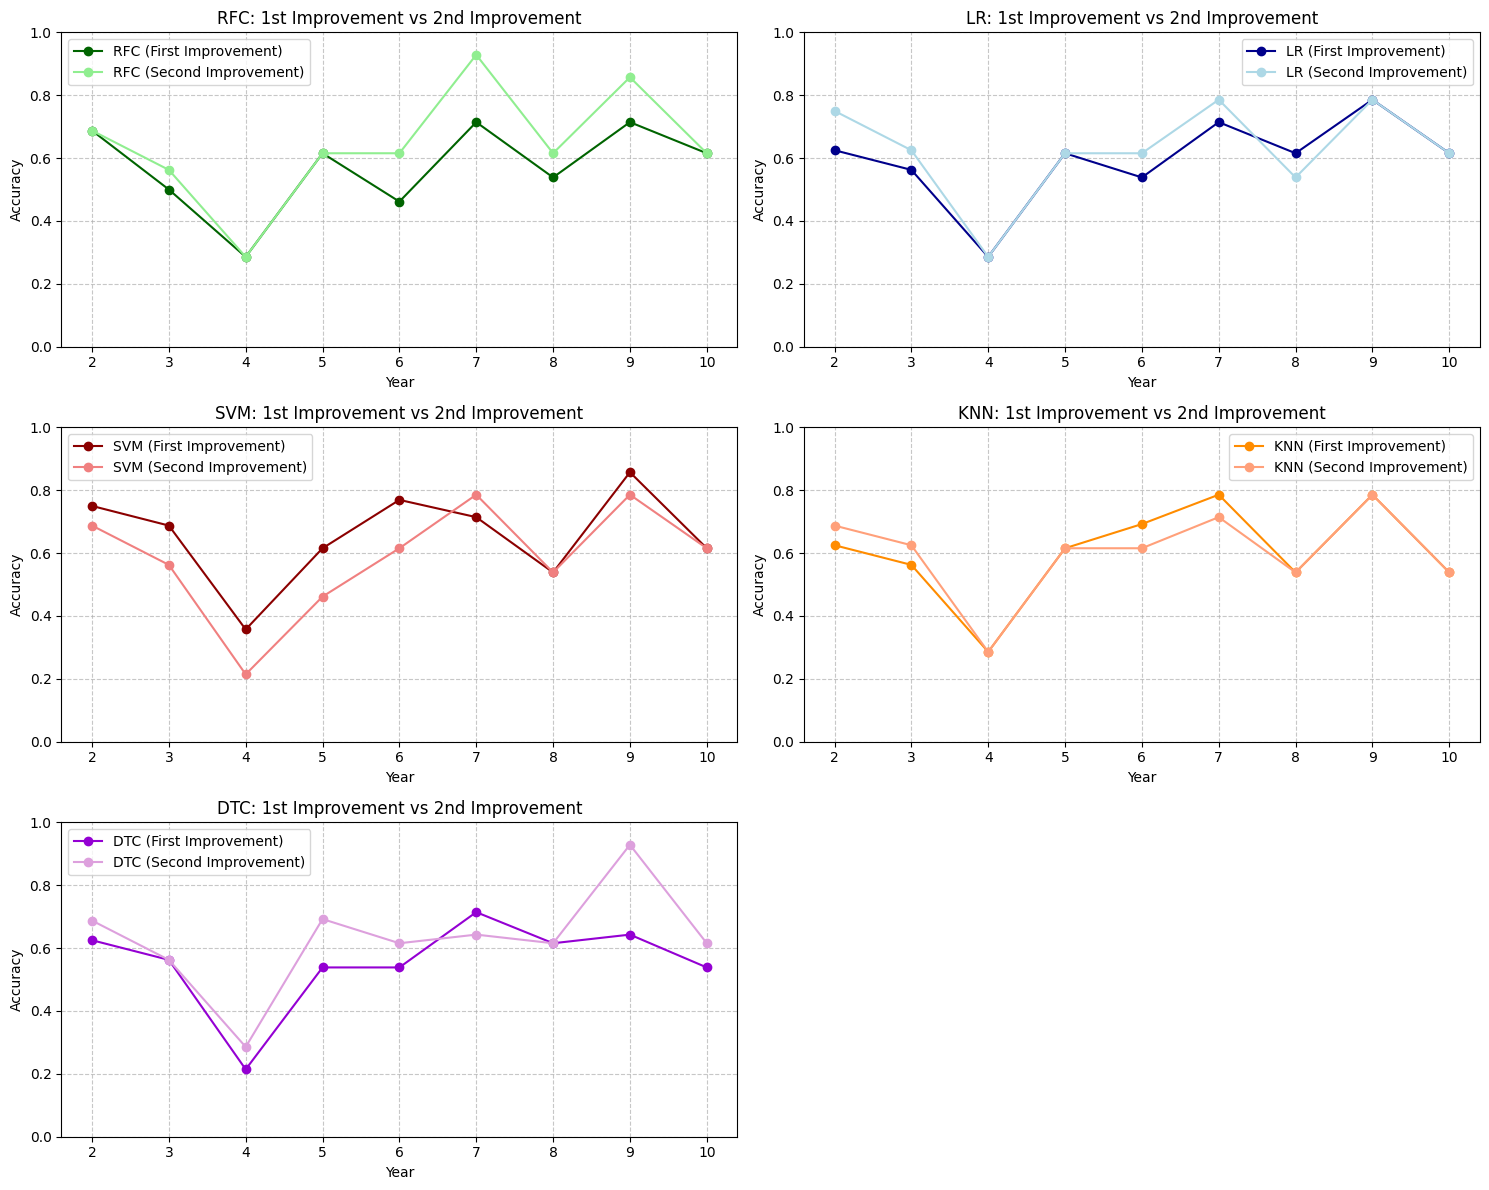

In [3]:
years = range(2, 11)

accuracy_years_RFC_1 = [0.6875, 0.5, 0.2857142857142857, 0.6153846153846154, 0.46153846153846156, 0.7142857142857143, 0.5384615384615384, 0.7142857142857143, 0.6153846153846154]
accuracy_years_LR_1 = [0.625, 0.5625, 0.2857142857142857, 0.6153846153846154, 0.5384615384615384, 0.7142857142857143, 0.6153846153846154, 0.7857142857142857, 0.6153846153846154]
accuracy_years_SVM_1 = [0.75, 0.6875, 0.35714285714285715, 0.6153846153846154, 0.7692307692307693, 0.7142857142857143, 0.5384615384615384, 0.8571428571428571, 0.6153846153846154]
accuracy_years_KNN_1 = [0.625, 0.5625, 0.2857142857142857, 0.6153846153846154, 0.6923076923076923, 0.7857142857142857, 0.5384615384615384, 0.7857142857142857, 0.5384615384615384]
accuracy_years_DTC_1 = [0.625, 0.5625, 0.21428571428571427, 0.5384615384615384, 0.5384615384615384, 0.7142857142857143, 0.6153846153846154, 0.6428571428571429, 0.5384615384615384]

# Second improvement accuracy
accuracy_years_RFC_2 = [0.6875, 0.5625, 0.2857142857142857, 0.6153846153846154, 0.6153846153846154, 0.9285714285714286, 0.6153846153846154, 0.8571428571428571, 0.6153846153846154]
accuracy_years_LR_2 = [0.75, 0.625, 0.2857142857142857, 0.6153846153846154, 0.6153846153846154, 0.7857142857142857, 0.5384615384615384, 0.7857142857142857, 0.6153846153846154]
accuracy_years_SVM_2 = [0.6875, 0.5625, 0.21428571428571427, 0.46153846153846156, 0.6153846153846154, 0.7857142857142857, 0.5384615384615384, 0.7857142857142857, 0.6153846153846154]
accuracy_years_KNN_2 = [0.6875, 0.625, 0.2857142857142857, 0.6153846153846154, 0.6153846153846154, 0.7142857142857143, 0.5384615384615384, 0.7857142857142857, 0.5384615384615384]
accuracy_years_DTC_2 = [0.6875, 0.5625, 0.2857142857142857, 0.6923076923076923, 0.6153846153846154, 0.6428571428571429, 0.6153846153846154, 0.9285714285714286, 0.6153846153846154]

fig, axs = plt.subplots(3, 2, figsize=(15, 12))

axs[0, 0].plot(years, accuracy_years_RFC_1, label='RFC (First Improvement)', marker='o', color='darkgreen')
axs[0, 0].plot(years, accuracy_years_RFC_2, label='RFC (Second Improvement)', marker='o', color='lightgreen')
axs[0, 0].set_title('RFC: 1st Improvement vs 2nd Improvement')
axs[0, 0].set_ylim(0, 1)
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].grid(True, linestyle='--', alpha=0.7)
axs[0, 0].legend()

axs[0, 1].plot(years, accuracy_years_LR_1, label='LR (First Improvement)', marker='o', color='darkblue')
axs[0, 1].plot(years, accuracy_years_LR_2, label='LR (Second Improvement)', marker='o', color='lightblue')
axs[0, 1].set_title('LR: 1st Improvement vs 2nd Improvement')
axs[0, 1].set_ylim(0, 1)
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Accuracy')
axs[0, 1].grid(True, linestyle='--', alpha=0.7)
axs[0, 1].legend()

axs[1, 0].plot(years, accuracy_years_SVM_1, label='SVM (First Improvement)', marker='o', color='darkred')
axs[1, 0].plot(years, accuracy_years_SVM_2, label='SVM (Second Improvement)', marker='o', color='lightcoral')
axs[1, 0].set_title('SVM: 1st Improvement vs 2nd Improvement')
axs[1, 0].set_ylim(0, 1)
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Accuracy')
axs[1, 0].grid(True, linestyle='--', alpha=0.7)
axs[1, 0].legend()

axs[1, 1].plot(years, accuracy_years_KNN_1, label='KNN (First Improvement)', marker='o', color='darkorange')
axs[1, 1].plot(years, accuracy_years_KNN_2, label='KNN (Second Improvement)', marker='o', color='lightsalmon')
axs[1, 1].set_title('KNN: 1st Improvement vs 2nd Improvement')
axs[1, 1].set_ylim(0, 1)
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Accuracy')
axs[1, 1].grid(True, linestyle='--', alpha=0.7)
axs[1, 1].legend()

axs[2, 0].plot(years, accuracy_years_DTC_1, label='DTC (First Improvement)', marker='o', color='darkviolet')
axs[2, 0].plot(years, accuracy_years_DTC_2, label='DTC (Second Improvement)', marker='o', color='plum')
axs[2, 0].set_title('DTC: 1st Improvement vs 2nd Improvement')
axs[2, 0].set_ylim(0, 1)
axs[2, 0].set_xlabel('Year')
axs[2, 0].set_ylabel('Accuracy')
axs[2, 0].grid(True, linestyle='--', alpha=0.7)
axs[2, 0].legend()

# Hide the unused subplot
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()
